# Netflix Movies And TV Shows

The goal here are the following but one concept will remain the same throughout i.e. visualisation:
- Understanding the total shows and movies present.
- Knowing which countries are majorly making new movies/shows.
- Knowing the distribution of the uploads among various age groups.
- Finding out the distribution between the years and the upload count.
- Understanding the general plot distribution using descriptions.
- Comparing the popular genres for American and Indian uploads.

## Imports
The major graph plotting is done here using ```plotly```, you can move ahead with ```matplotlib``` too, but I find plotly more interactive and visually pleasing, but do note that it was hard for me to get around with its documentations.

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('netflix_titles.csv')
data = data.drop(['director','cast'],axis=1)
data.head(5)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Cleaning

In [3]:
data[data['rating'].isnull()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
2359,s2360,TV Show,Gargantia on the Verdurous Planet,Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
3660,s3661,TV Show,Little Lunch,Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
3736,s3737,Movie,Louis C.K. 2017,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
3737,s3738,Movie,Louis C.K.: Hilarious,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
3738,s3739,Movie,Louis C.K.: Live at the Comedy Store,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
4323,s4324,Movie,My Honor Was Loyalty,Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [4]:
 print(pd.unique(data['rating']))

['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' nan 'TV-Y7' 'PG'
 'G' 'NC-17' 'TV-Y7-FV' 'UR']


We replace the <em>rating</em> null values with "NR" and <em>country</em> null values with "United States" as it is generally the country that uploads a lot of Movies and TV Shows.

In [5]:
data['rating'].fillna('NR',inplace = True)
data['country'].fillna('United States',inplace = True)
print(pd.unique(data['rating']))
data.info()

['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' 'TV-Y7' 'PG' 'G'
 'NC-17' 'TV-Y7-FV' 'UR']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   country       7787 non-null   object
 4   date_added    7777 non-null   object
 5   release_year  7787 non-null   int64 
 6   rating        7787 non-null   object
 7   duration      7787 non-null   object
 8   listed_in     7787 non-null   object
 9   description   7787 non-null   object
dtypes: int64(1), object(9)
memory usage: 608.5+ KB


## Preprocessing

One of our goals is to compare the popular genres and hence we first begin to find if the movies fit into the genres. The given genres for a movie can contain quite some genres as a string, hence we have to split then figure out, so for each movie we consider the 6 popular geners that we know and that are present in the dataset and then make new columns.


As we need to compare United States and India's releases in the end, we also need to know whether the movie or show was shot or whether it belonged to either one of them and similar to previous scenario, a movie can have multiple countries in a form of a string, hence we got to split it and figure it out.

In [6]:
genres = {'Action & Adventure': [],'Dramas' : [],'Documentaries': [],'Comedies': [],'Sci-Fi & Fantasy': [],'Thrillers': []}
indices = {'Action & Adventure': 0,'Dramas' : 1,'Documentaries': 2,'Comedies': 3,'Sci-Fi & Fantasy': 4,'Thrillers': 5}
india = []
usa = []


for i,row in data.iterrows():
    done = [False] * 6
    for g in row['listed_in'].split(','):
        if g.strip() in genres and done[indices[g.strip()]] == False:
            genres[g.strip()].append(1)
            done[indices[g.strip()]] = True
    for k in genres.keys():
        if done[indices[k]] == False:
            genres[k].append(0)
    ind = us = False
    for c in row['country'].split(','):
        if c == "India":
            ind = True
        if c == "United States":
            us = True
    india.append(1 if ind else 0)
    usa.append(1 if us else 0)

data.insert(9, "Action & Adventure",genres['Action & Adventure'], True)
data.insert(9, "Dramas",genres['Dramas'], True)
data.insert(9, "Documentaries",genres['Documentaries'], True)
data.insert(9, "Comedies",genres['Comedies'], True)
data.insert(9, "Sci-Fi & Fantasy",genres['Sci-Fi & Fantasy'], True)
data.insert(9, "Thrillers",genres['Thrillers'], True)
data.insert(4, "USA",usa, True)
data.insert(4, "India",india, True)
data.head()

,show_id,type,title,country,India,USA,date_added,release_year,rating,duration,listed_in,Thrillers,Sci-Fi & Fantasy,Comedies,Documentaries,Dramas,Action & Adventure,description
0,s1,TV Show,3%,Brazil,0,0,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",0,0,0,0,0,0,In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,0,0,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",0,0,0,0,1,0,After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,0,0,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",0,0,0,0,0,0,"When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,0,1,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",0,1,0,0,0,1,"In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,0,1,"January 1, 2020",2008,PG-13,123 min,Dramas,0,0,0,0,1,0,A brilliant group of students become card-coun...


## Movies vs TV Shows
Now let us try to understand how the data is distributed between Movies and TV Shows.

In [7]:
 print(pd.unique(data['type']))

['TV Show' 'Movie']


In [8]:
typeFrame = data['type'].value_counts().reset_index()

In [9]:
fig = px.pie(typeFrame,values = 'type',labels = 'index',template = 'plotly_dark')
fig.update_traces(hole = 0.6, pull = [0.05,0.05], title = 'Movies<br> VS <br>TV Shows', opacity = 0.7,
text = ["Movie", "TV Show"],
hovertemplate = "%{text} <br>Count: %{value}",
textfont=dict(
        family="sans serif",
        size=18,
        color="black"
    ),
marker= dict(
    line= dict(
        color='black', width=1.5
        )
    ),
)
fig.show()

## Upload Count by Country

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   show_id             7787 non-null   object
 1   type                7787 non-null   object
 2   title               7787 non-null   object
 3   country             7787 non-null   object
 4   India               7787 non-null   int64 
 5   USA                 7787 non-null   int64 
 6   date_added          7777 non-null   object
 7   release_year        7787 non-null   int64 
 8   rating              7787 non-null   object
 9   duration            7787 non-null   object
 10  listed_in           7787 non-null   object
 11  Thrillers           7787 non-null   int64 
 12  Sci-Fi & Fantasy    7787 non-null   int64 
 13  Comedies            7787 non-null   int64 
 14  Documentaries       7787 non-null   int64 
 15  Dramas              7787 non-null   int64 
 16  Action & Adventure  7787

In [11]:
country_data =  data['country'].value_counts().reset_index()
top10 = country_data[:10]
top10

,index,country
0,United States,3062
1,India,923
2,United Kingdom,397
3,Japan,226
4,South Korea,183
5,Canada,177
6,Spain,134
7,France,115
8,Egypt,101
9,Mexico,100


In [12]:
fig = px.bar(top10,x = 'index', y = 'country',labels = {'index' : 'Countries', 'country' : 'Total Uploads'},title='Uploads by Country',template = 'plotly_dark')
fig.update_traces(
    hovertemplate = '%{x} <br>Total : %{y}',
)
fig.show()

## Sentiment Analysis

Using textblob to understand, we select words from description that are either Adjective, Verb or Adverb, then we use WordCloud and plot it over a masked netflix logo image.


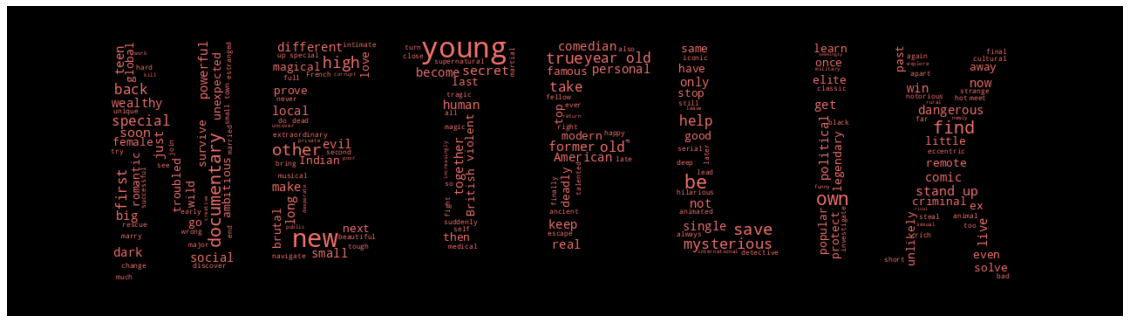

In [13]:
from textblob import TextBlob
from wordcloud import WordCloud
from PIL import Image
import random

deets = str(list(data['description'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')
def get_nouns(text):
    blob = TextBlob(text)
    return [ word for (word,tag) in blob.tags if tag == "JJ" or tag == "VB" or tag == "RB"]

deets = get_nouns(deets)
text = str(deets).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

def red_color_func(word, font_size, position, orientation, random_state = None, **kwargs):
    return 'rgb(241,114,109)'

mask = np.array(Image.open('netflixLogo.png'))
mask = mask[::2,::2]
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

newMask = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)
for i in range(len(mask)):
    newMask[i] = list(map(transform_format, mask[i]))
    
    
plt.rcParams['figure.figsize'] = (20, 20)
wordcloud = WordCloud(background_color = 'black',mask = newMask, stopwords = ['s']).generate(text)

wordcloud.recolor(color_func = red_color_func)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## Upload Count by Year
Realising that there are certain movies and shows that do not have the <em>date_added</em> value I decided to replace it with the mean of the <em>addedYear</em> of the movies and Tv Shows that didn't contain null values.

In [14]:
from statistics import mean
data['date_added'] = data['date_added'].fillna('Nothingness')
addedYear = []

for i,row in data.iterrows():
    year = row['date_added'][-4:]
    if year.isnumeric():
        addedYear.append(int(year))
    else:
        addedYear.append(-1)
value = int(mean([x for x in addedYear if x != -1]))
addedYear = [value if x == -1 else x for x in addedYear]
data.insert(7, "addedYear",addedYear, True)
data.head()

,show_id,type,title,country,India,USA,date_added,addedYear,release_year,rating,duration,listed_in,Thrillers,Sci-Fi & Fantasy,Comedies,Documentaries,Dramas,Action & Adventure,description
0,s1,TV Show,3%,Brazil,0,0,"August 14, 2020",2020,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",0,0,0,0,0,0,In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,0,0,"December 23, 2016",2016,2016,TV-MA,93 min,"Dramas, International Movies",0,0,0,0,1,0,After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,0,0,"December 20, 2018",2018,2011,R,78 min,"Horror Movies, International Movies",0,0,0,0,0,0,"When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,0,1,"November 16, 2017",2017,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",0,1,0,0,0,1,"In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,0,1,"January 1, 2020",2020,2008,PG-13,123 min,Dramas,0,0,0,0,1,0,A brilliant group of students become card-coun...


In [15]:
movie_data = data[data['type'] == 'Movie']['addedYear'].value_counts().reset_index().sort_values(by=['index'])
tv_data = data[data['type'] == 'TV Show']['addedYear'].value_counts().reset_index().sort_values(by=['index'])
overall_data = data['addedYear'].value_counts().reset_index().sort_values(by=['index'])
overall_data

,index,addedYear
11,2008,2
12,2009,2
13,2010,1
8,2011,13
10,2012,3
9,2013,11
7,2014,25
6,2015,88
4,2016,443
3,2017,1225


In [16]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(x = list(movie_data['index']), y = list(movie_data.addedYear),mode = 'lines + markers',name = 'Movies')
)
fig.add_trace(
    go.Scatter(x = list(tv_data['index']), y = list(tv_data.addedYear),mode = 'lines + markers',name = 'TV Shows')
)
fig.add_trace(
    go.Scatter(x = list(overall_data['index']), y =list(overall_data.addedYear),mode = 'lines + markers',name = 'Total')
)
fig.update_layout(title = 'Upload Count by Years',plot_bgcolor = 'black',template = 'plotly_dark')
fig.update_xaxes(showline = True,title = 'Years')
fig.update_yaxes(showline = True,title = 'Upload Count')

## Rating Distribution

We first convert the given ratings to a specific target audience to simplify the number of variables being present.

In [17]:
from collections import defaultdict
ratingTags ={'TV-MA': 'Adults',
          'R': 'Adults',
          'PG-13': 'Teens',
          'TV-14': 'Young Adults',
          'TV-PG': 'Older Kids',
          'NR': 'Adults',
          'TV-G': 'Kids',
          'TV-Y': 'Kids',
          'TV-Y7': 'Older Kids',
          'PG': 'Older Kids',
          'G': 'Kids',
          'NC-17': 'Adults',
          'TV-Y7-FV': 'Older Kids',
          'UR': 'Adults'}
ratingDict = defaultdict(int)
movieRating = defaultdict(int)
tvRating = defaultdict(int)
for i,row in data.iterrows():
    ratingDict[ratingTags[row['rating']]] += 1
    if row['type'] == 'Movie':
        movieRating[ratingTags[row['rating']]] += 1
    else:
        tvRating[ratingTags[row['rating']]] += 1
ratingDict

defaultdict(int,
            {'Adults': 3627,
             'Teens': 386,
             'Young Adults': 1931,
             'Older Kids': 1330,
             'Kids': 513})

In [18]:
y = ratingDict.values()
labs = ratingDict.keys()
fig = px.pie(values = y, title="Overall Rating Distribution",template = 'plotly_dark')
fig.update_traces(
    text = list(labs),
    hovertemplate = 'Total : %{value}'
)
fig.show()

In [19]:
y = movieRating.values()
labs = movieRating.keys()
fig = px.pie(values = y, title="Movies Rating Distribution",template = 'plotly_dark')
fig.update_traces(
    text = list(labs),
    hovertemplate = 'Total : %{value}'
)
fig.show()

In [20]:
y = tvRating.values()
labs = tvRating.keys()
fig = px.pie(values = y, title="TV Shows Rating Distribution",template = 'plotly_dark')
fig.update_traces(
    text = list(labs),
    hovertemplate = 'Total : %{value}'
)
fig.show()

## Comparison between genre uploads of USA and India

In [21]:
splitDf = data[(data['India'] == 1) | (data["USA"] == 1)]
compareDf = pd.DataFrame(columns = ['country', 'genre', 'count'], index = range(12))
compareDf.iloc[0:6, 0] = 'United States'
compareDf.iloc[6:12, 0] = 'India'
compareDf.iloc[[0, 6], 1] = 'Dramas'
compareDf.iloc[[1, 7], 1] = 'Comedies'
compareDf.iloc[[2, 8], 1] = 'Action & Adventure'
compareDf.iloc[[3, 9], 1] = 'Documentaries'
compareDf.iloc[[4, 10], 1] = 'Thrillers'
compareDf.iloc[[5,11], 1] = 'Sci-Fi & Fantasy'
compareDf.iloc[:,2] = 0
compareDf

,country,genre,count
0,United States,Dramas,0
1,United States,Comedies,0
2,United States,Action & Adventure,0
3,United States,Documentaries,0
4,United States,Thrillers,0
5,United States,Sci-Fi & Fantasy,0
6,India,Dramas,0
7,India,Comedies,0
8,India,Action & Adventure,0
9,India,Documentaries,0


In [22]:
gs = ['Comedies','Action & Adventure','Documentaries','Thrillers','Sci-Fi & Fantasy','Dramas']
for i in range(6):
    cat = gs[i]
    compareDf.iloc[i,2] = splitDf.query('USA == 1 & `{0}` == 1'.format(cat)).agg(['count'])
for i in range(6,12):
    cat = gs[i % 6]
    compareDf.iloc[i,2] = splitDf.query('India == 1 & `{0}` == 1'.format(cat)).agg(['count'])
compareDf

,country,genre,count
0,United States,Dramas,567
1,United States,Comedies,260
2,United States,Action & Adventure,465
3,United States,Documentaries,216
4,United States,Thrillers,128
5,United States,Sci-Fi & Fantasy,628
6,India,Dramas,300
7,India,Comedies,127
8,India,Action & Adventure,19
9,India,Documentaries,88


In [23]:
fig = px.sunburst(compareDf, path=['country','genre'], values = 'count', width = 700, height = 700, color = 'country', title = 'Comparision Between The Top 2 Uploading Countries',template = 'plotly_dark',color_discrete_map = {'US': '#e6705e', 'India': '#7dfff2'})
fig.update_traces(textinfo = 'label + percent parent')
fig.show()
